In [3]:
from PIL import ImageFont, ImageDraw, Image
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data_path = '/data/steeve/mandarin/frames/'
frame_list = glob.glob(f'{data_path}/*')

In [6]:
import os

In [11]:
font_list =  os.listdir('/usr/share/fonts/truetype/')
font_list = [f for f in font_list if '.ttf' in f] 
font_list

['yahei.ttf', 'wt024.ttf', 'BKT.ttf', 'rouhei.ttf']

In [16]:
def get_labels(img):
    label = img.copy()
#     label = cv2.cvtColor(label, cv2.COLOR_BGR2GRAY)
#     print(img.shape)
    _, label = cv2.threshold(label, 80, 255, cv2.THRESH_BINARY)

    return label

In [77]:
def generate(file_name, text, font_type, text_location = 0.84 , draw_number=1, font_size = 22):
    im = cv2.imread(file_name)
    y, x,_ = im.shape
    im = im[:int(0.8*y),:,:]
    firstcrop_y, firstcrop_x,_ = im.shape
    cv2_im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB) # cv2和PIL中颜色的hex码的储存顺序不同

    pil_im = Image.fromarray(np.zeros([firstcrop_y, firstcrop_x,3]).astype('uint8'))
    draw = ImageDraw.Draw(pil_im) # 括号中为需要打印的canvas，这里就是在图片上直接打印

    font = ImageFont.truetype(font_type, font_size, encoding="utf-8")
    
    x, y = pil_im.width, pil_im.height
    x /=2
    y = text_location * y
    shadowcolor = (0, 0, 0)

    text_width, text_height = font.getsize(text)
    x = x-text_width /2
    for i in range(draw_number):
        draw.text((x-1, y), text, font=font, fill=shadowcolor)
        draw.text((x+1, y), text, font=font, fill=shadowcolor)
        draw.text((x, y-1), text, font=font, fill=shadowcolor)
        draw.text((x, y+1), text, font=font, fill=shadowcolor)
    
    draw.text((x, y), text, (255, 255, 255), font=font)
    pil_im = cv2.cvtColor(np.array(pil_im), cv2.COLOR_BGR2GRAY)
    label = get_labels(np.array(pil_im))
    # 
    label[np.where(label == 255)] = 1
    y, x = label.shape
    
    sample = Image.fromarray(cv2_im)

    draw = ImageDraw.Draw(sample) 
    font = ImageFont.truetype(font_type, font_size, encoding="utf-8")
    x, y = sample.width, sample.height
    x /=2
    y = text_location * y
    x = x-text_width /2
    for i in range(draw_number):
        draw.text((x-1, y), text, font=font, fill=shadowcolor)
        draw.text((x+1, y), text, font=font, fill=shadowcolor)
        draw.text((x, y-1), text, font=font, fill=shadowcolor)
        draw.text((x, y+1), text, font=font, fill=shadowcolor)
    draw.text((x, y), text, (255, 255, 255), font=font)
    sample = np.array(sample)
    return sample, font.getmask("ff", mode=1)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f6683f36c80> (for post_execute):


AttributeError: 'numpy.ndarray' object has no attribute 'mask'

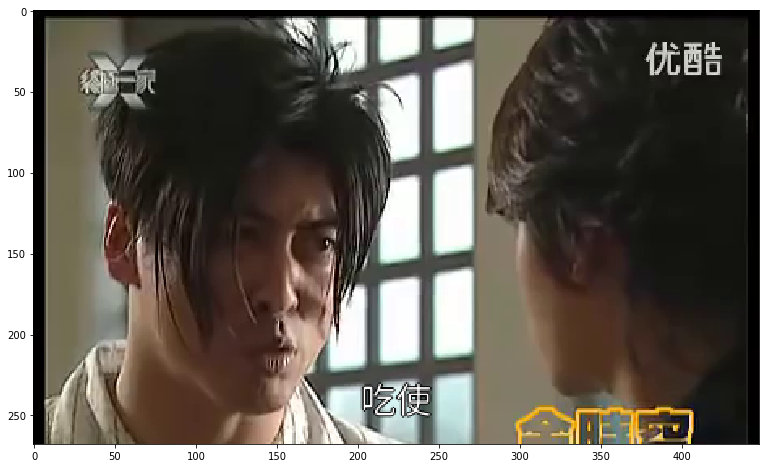

AttributeError: 'numpy.ndarray' object has no attribute 'mask'

<Figure size 936x936 with 1 Axes>

In [78]:
sp, lb = generate(frame_list[0], "吃使", font_list[3])
fig, ax = plt.subplots(figsize=(13, 13))
plt.imshow(sp)
fig, ax = plt.subplots(figsize=(13, 13))
plt.imshow(lb)

In [59]:
font = ImageFont.truetype(font_list[0], 22, encoding="utf-8")

In [83]:
lb.getbbox()

(0, 0, 15, 18)